In [2]:
from openai import OpenAI
from PIL import Image
from io import BytesIO
import base64

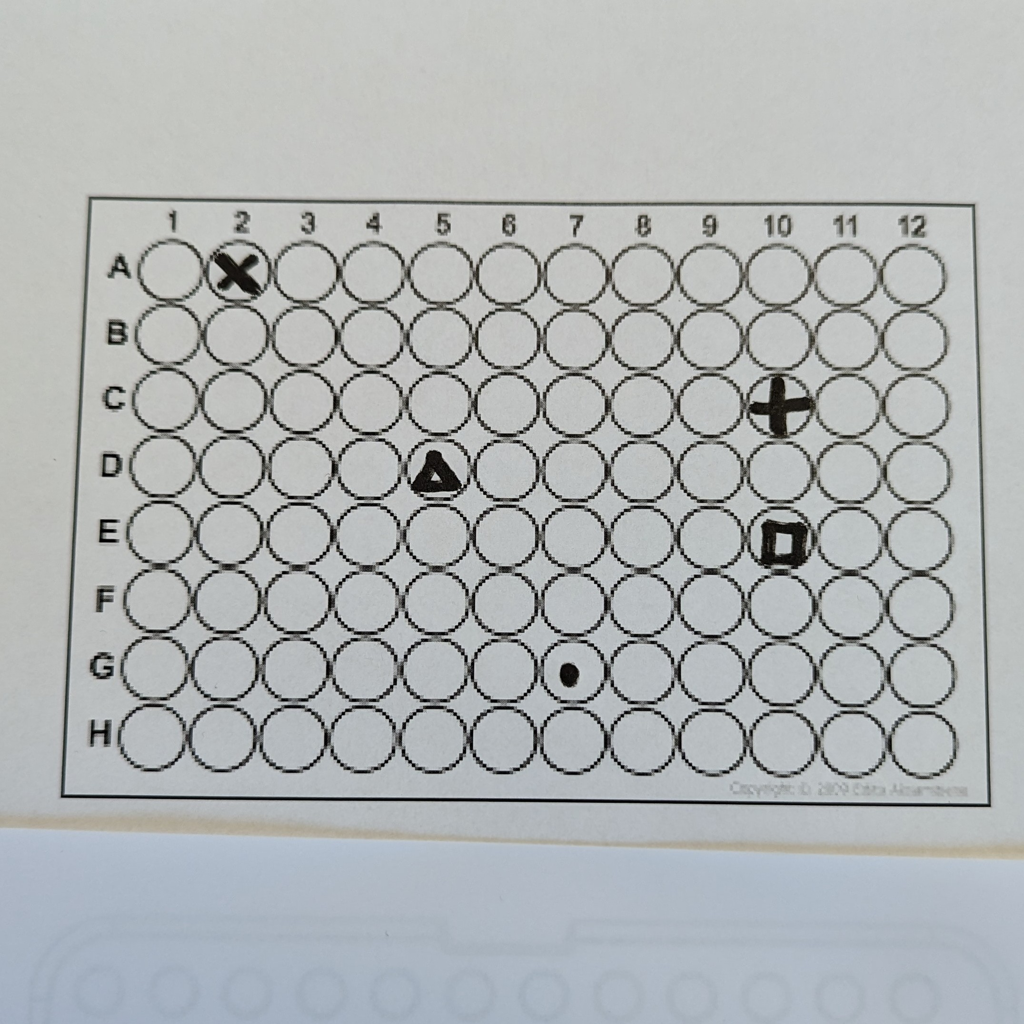

In [15]:
im = Image.open("reference-test.jpg")
im = im.resize((1024, 1024))
im

In [16]:
im_file = BytesIO()
im.save(im_file, format="JPEG")
im_bytes = im_file.getvalue()
im_b64 = base64.b64encode(im_bytes).decode('utf-8')

In [18]:
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "You are looking at a 96 well plate with  labels. List the shapes and which exact grid location each shape is contained in. Look carefully and get the exact spot.",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{im_b64}",
                        "detail": "high",
                    }, 
                },
            ],
        }
    ],
    max_tokens=300,
)
print(response.choices[0].message.content)

In the image of the 96-well plate, there are several shapes, each located in a specific well. Here is a list of the shapes and their corresponding grid locations:

1. Cross (X): Located in well A2.
2. Triangle (▲): Located in well D5.
3. Square with stripes: Located in well E8.
4. Circle with a dot in the center (•): Located in well G9.
